In [1]:
from utils import *
from train import *


import pandas as pd
import numpy as np

In [6]:
# Cuda is mandatory to run this notebook
!nvidia-smi

Mon Mar 20 11:37:56 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 528.02       Driver Version: 528.02       CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:02:00.0 Off |                  N/A |
| N/A   64C    P0    N/A /  N/A |    109MiB /  2048MiB |     12%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [7]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Tue_May__3_19:00:59_Pacific_Daylight_Time_2022
Cuda compilation tools, release 11.7, V11.7.64
Build cuda_11.7.r11.7/compiler.31294372_0


# Dataset Description

In [10]:
data  = pd.read_csv('data/SEM-2012-SharedTask-CD-SCO-training-simple.v2.txt', sep='\t', header=None)
test  = pd.read_csv('data/SEM-2012-SharedTask-CD-SCO-test-cardboard.txt',     sep='\t', header=None)
test1 = pd.read_csv('data/SEM-2012-SharedTask-CD-SCO-test-circle.txt',        sep='\t', header=None)

In [12]:
data.rename(columns={0: 'file',
                    1: 'nSentence',
                    2: 'nToken',
                    3: 'token',
                    4: 'Gold Label'}, inplace=True)

test.rename(columns={0: 'file',
                    1: 'nSentence',
                    2: 'nToken',
                    3: 'token',
                    4: 'Gold Label'}, inplace=True)

test1.rename(columns={0: 'file',
                    1: 'nSentence',
                    2: 'nToken',
                    3: 'token',
                    4: 'Gold Label'}, inplace=True)                

In [17]:
# show missing values, if any. Show number of data points per class gold label
print(data.isnull().sum())
print(data['Gold Label'].value_counts())
print()
print(test.isnull().sum())
print(test['Gold Label'].value_counts())
print()
print(test1.isnull().sum())
print(test1['Gold Label'].value_counts())
print()
# no missing values, highly unbalanced dataset

file          0
nSentence     0
nToken        0
token         0
Gold Label    0
dtype: int64
O        64448
B-NEG      987
I-NEG       16
Name: Gold Label, dtype: int64

file          0
nSentence     0
nToken        0
token         0
Gold Label    0
dtype: int64
O        10049
B-NEG      134
I-NEG        1
Name: Gold Label, dtype: int64

file          0
nSentence     0
nToken        0
token         0
Gold Label    0
dtype: int64
O        8893
B-NEG     135
I-NEG       4
Name: Gold Label, dtype: int64



# Experiments

In [5]:
test_df  = build_dataframe(    "data/SEM-2012-SharedTask-CD-SCO-test-cardboard.txt")
test2_df = build_dataframe("data/SEM-2012-SharedTask-CD-SCO-test-circle.txt"       )
df       = build_dataframe("data/SEM-2012-SharedTask-CD-SCO-training-simple.v2.txt")
dev_df   = build_dataframe("data/SEM-2012-SharedTask-CD-SCO-dev-simple.v2.txt"     )

In [12]:
X_train =        df[['token','lemma','prev_lemma','tag','dependency','head','root_path','neg_exp_list', 'affix_cue']].copy()
X_test  =   test_df[['token','lemma','prev_lemma','tag','dependency','head','root_path','neg_exp_list', 'affix_cue']].copy()
X_test2 =  test2_df[['token','lemma','prev_lemma','tag','dependency','head','root_path','neg_exp_list', 'affix_cue']].copy()
X_dev   =    dev_df[['token','lemma','prev_lemma','tag','dependency','head','root_path','neg_exp_list', 'affix_cue']].copy()


y_train, y_test, y_test2,  y_dev = df['negCue'], test_df['negCue'], test2_df['negCue'], dev_df['negCue']


print(f'X train shape: {X_train.shape},  y train shape: {y_train.shape}')
print(f'X test shape: {X_test.shape},  y test shape: {y_test.shape}')
print(f'X test 2 shape: {X_test2.shape},  y test 2 shape: {y_test2.shape}')
print(f'X dev shape: {X_dev.shape},  y dev shape: {y_dev.shape}')

X train shape: (65451, 9),  y train shape: (65451,)
X test shape: (10184, 9),  y test shape: (10184,)
X test 2 shape: (9032, 9),  y test 2 shape: (9032,)
X dev shape: (13567, 9),  y dev shape: (13567,)


In [12]:
print('y_train:\n',y_train.value_counts())
print()
print('y_test:\n',y_test.value_counts())
print()
print('y_test2:\n',y_test2.value_counts())
print()
print('y_dev:\n',y_dev.value_counts())

y_train:
 0    64448
1      987
2       16
Name: negCue, dtype: int64

y_test:
 0    10049
1      134
2        1
Name: negCue, dtype: int64

y_test2:
 0    8893
1     135
2       4
Name: negCue, dtype: int64

y_dev:
 0    13388
1      176
2        3
Name: negCue, dtype: int64


In [13]:
# get the best model
svm_metrics, svm_best_params, models_svm = ablation_study('svm', X_train, y_train)

run: 1
BEST PARAMS FOUND BY GRID SEARCH:  {'classifier__C': 1.0, 'classifier__gamma': 1, 'classifier__kernel': 'linear'}
Time taken: 1.02 minutes
run: 2
BEST PARAMS FOUND BY GRID SEARCH:  {'classifier__C': 1.0, 'classifier__gamma': 1, 'classifier__kernel': 'linear'}
Time taken: 0.96 minutes
run: 3
BEST PARAMS FOUND BY GRID SEARCH:  {'classifier__C': 1.0, 'classifier__gamma': 0.5, 'classifier__kernel': 'polynomial'}
Time taken: 0.81 minutes
run: 4
BEST PARAMS FOUND BY GRID SEARCH:  {'classifier__C': 10.0, 'classifier__gamma': 1, 'classifier__kernel': 'polynomial'}
Time taken: 0.78 minutes
run: 5
BEST PARAMS FOUND BY GRID SEARCH:  {'classifier__C': 1.0, 'classifier__gamma': 0.5, 'classifier__kernel': 'polynomial'}
Time taken: 0.70 minutes
run: 6
BEST PARAMS FOUND BY GRID SEARCH:  {'classifier__C': 1.0, 'classifier__gamma': 0.5, 'classifier__kernel': 'polynomial'}
Time taken: 0.71 minutes
run: 7
BEST PARAMS FOUND BY GRID SEARCH:  {'classifier__C': 1.0, 'classifier__gamma': 1, 'classifier_

In [14]:
xgb_metrics, xgb_best_params, models_xgb = ablation_study('xgb', X_train, y_train)

run: 1
BEST PARAMS FOUND BY GRID SEARCH:  {'classifier__colsample_bytree': 1.0, 'classifier__learning_rate': 0.1, 'classifier__max_depth': 5}
Time taken: 1.43 minutes
run: 2
BEST PARAMS FOUND BY GRID SEARCH:  {'classifier__colsample_bytree': 1.0, 'classifier__learning_rate': 0.1, 'classifier__max_depth': 5}
Time taken: 1.16 minutes
run: 3
BEST PARAMS FOUND BY GRID SEARCH:  {'classifier__colsample_bytree': 0.6, 'classifier__learning_rate': 0.3, 'classifier__max_depth': 3}
Time taken: 1.09 minutes
run: 4
BEST PARAMS FOUND BY GRID SEARCH:  {'classifier__colsample_bytree': 1.0, 'classifier__learning_rate': 0.3, 'classifier__max_depth': 5}
Time taken: 1.22 minutes
run: 5
BEST PARAMS FOUND BY GRID SEARCH:  {'classifier__colsample_bytree': 0.6, 'classifier__learning_rate': 0.3, 'classifier__max_depth': 5}
Time taken: 1.22 minutes
run: 6
BEST PARAMS FOUND BY GRID SEARCH:  {'classifier__colsample_bytree': 0.6, 'classifier__learning_rate': 0.3, 'classifier__max_depth': 5}
Time taken: 1.07 minute

In [46]:
# save the model
filename = 'svm_metrics.sav'
filename2 = 'svm_params.sav'
filename3 = 'svm_models.sav'

save_metrics(svm_metrics, filename)
save_metrics(svm_best_params, filename2)
save_metrics(models_svm, filename3)

In [47]:
filename = 'xgb_metrics.sav'
filename2 = 'xgb_params.sav'
filename3 = 'xgb_models.sav'

save_metrics(xgb_metrics, filename)
save_metrics(xgb_best_params, filename2)
save_metrics(models_xgb, filename3)

In [ ]:
# import pickle
# with open('/content/resulst_xgb_metrica.sav', 'rb') as f:
#     metrics = pickle.load(f)

In [15]:
#metrics
models = []
for model1, model2 in zip(xgb_metrics, svm_metrics):
  print()
  print(model1)
  print(model2)



xgb_1: ['affix_cue', 'token', 'dependency', 'head', 'neg_exp_list', 'prev_lemma', 'tag', 'lemma', 'root_path']
svm_1: ['affix_cue', 'token', 'dependency', 'head', 'neg_exp_list', 'prev_lemma', 'tag', 'lemma', 'root_path']

xgb_2: ['affix_cue', 'token', 'dependency', 'head', 'neg_exp_list', 'prev_lemma', 'lemma', 'root_path']
svm_2: ['affix_cue', 'token', 'dependency', 'head', 'neg_exp_list', 'prev_lemma', 'lemma', 'root_path']

xgb_3: ['affix_cue', 'dependency', 'head', 'neg_exp_list', 'prev_lemma', 'lemma', 'root_path']
svm_3: ['affix_cue', 'dependency', 'head', 'neg_exp_list', 'prev_lemma', 'lemma', 'root_path']

xgb_4: ['affix_cue', 'head', 'neg_exp_list', 'prev_lemma', 'lemma', 'root_path']
svm_4: ['affix_cue', 'head', 'neg_exp_list', 'prev_lemma', 'lemma', 'root_path']

xgb_5: ['affix_cue', 'neg_exp_list', 'prev_lemma', 'lemma', 'root_path']
svm_5: ['affix_cue', 'neg_exp_list', 'prev_lemma', 'lemma', 'root_path']

xgb_6: ['prev_lemma', 'lemma', 'affix_cue', 'root_path']
svm_6: ['

In [16]:
new_metrics = {key.split(":")[0]: value for key, value in svm_metrics.items()}
new_metrics2 = {key.split(":")[0]: value for key, value in xgb_metrics.items()}

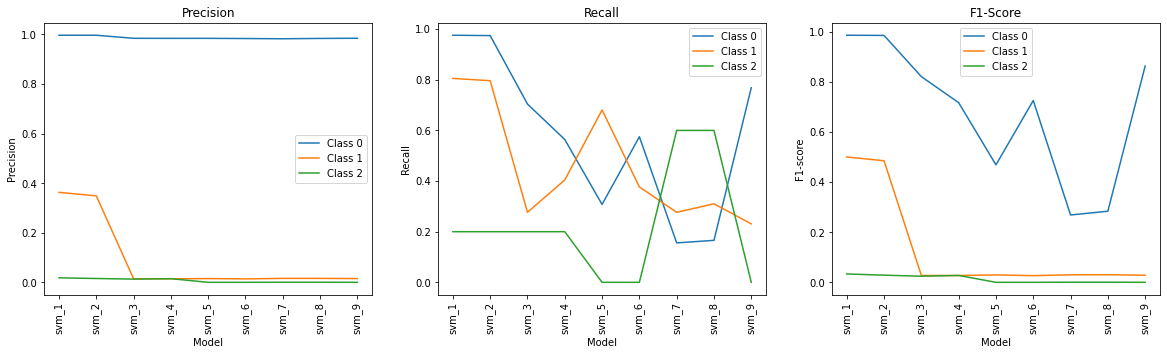

In [56]:
plots(new_metrics, None, 'Plots and results/metrics_svm_training.pdf')

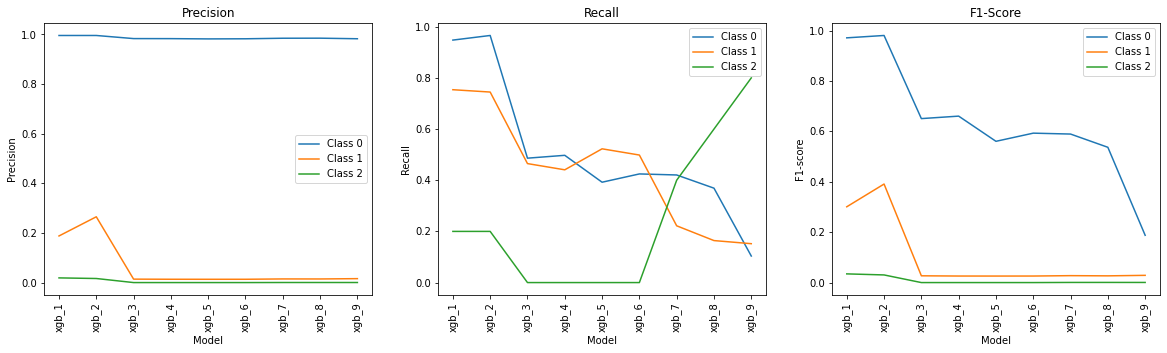

In [55]:
plots(new_metrics2, None, 'Plots and results/Metrics_xgb_training.pdf')

In [19]:
best_model_svm = get_best_model(new_metrics)
print('Best performing model:', best_model_svm)

Considering model svm_1  with score: 0.9787890347836843
Considering model svm_2  with score: 0.9777827258846548
Considering model svm_3  with score: 0.8089256113098988
Considering model svm_4  with score: 0.7066604340832985
Considering model svm_5  with score: 0.46214896931462995
Considering model svm_6  with score: 0.7150779087646283
Considering model svm_7  with score: 0.2651518958581443
Considering model svm_8  with score: 0.27990225270661107
Considering model svm_9  with score: 0.8505075368696446
Best performing model: svm_1


In [20]:
best_model_xgb = get_best_model(new_metrics2)
print('Best performing model:', best_model_xgb)

Considering model xgb_1  with score: 0.960934185718913
Considering model xgb_2  with score: 0.9715364501548615
Considering model xgb_3  with score: 0.6411826488340482
Considering model xgb_4  with score: 0.6508655897104512
Considering model xgb_5  with score: 0.5524296569387654
Considering model xgb_6  with score: 0.5843050868056593
Considering model xgb_7  with score: 0.5808156835179963
Considering model xgb_8  with score: 0.5290611703754775
Considering model xgb_9  with score: 0.18525632151467514
Best performing model: xgb_2


In [21]:
for model in models_xgb.keys():
  if best_model_xgb in model:
    grid_best_model_xgb = models_xgb[model]
grid_best_model_xgb

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('tfidf',
                                                                         Pipeline(steps=[('tfidf',
                                                                                          custom_tfidf(tfidf=TfidfVectorizer()))]),
                                                                         ['token',
                                                                          'dependency',
                                                                          'head',
                                                                          'prev_lemma',
                                                                          'lemma']),
                                                                        ('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['affix_cue',
                                                                          'neg_exp_list',
                                                                          'root_path'])])),
                                       ('sampler...
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None, ...))]),
             n_jobs=-1,
             param_grid={'classifier__colsample_bytree': [0.6, 1.0],
                         'classifier__learning_rate': [0.1, 0.3],
                         'classifier__max_depth': [3, 5]})

In [22]:
for model in models_svm.keys():
  if best_model_svm in model:
    grid_best_model_svm = models_svm[model]
grid_best_model_svm

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('tfidf',
                                                                         Pipeline(steps=[('tfidf',
                                                                                          custom_tfidf(tfidf=TfidfVectorizer()))]),
                                                                         ['token',
                                                                          'dependency',
                                                                          'head',
                                                                          'prev_lemma',
                                                                          'tag',
                                                                          'lemma']),
                                                                        ('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['affix_cue',
                                                                          'neg_exp_list',
                                                                          'root_path'])])),
                                       ('sampler',
                                        RandomOverSampler(sampling_strategy='minority')),
                                       ('undersampler',
                                        RandomUnderSampler(sampling_strategy='majority')),
                                       ('classifier', SVC())]),
             n_jobs=-1,
             param_grid={'classifier__C': [1.0, 10.0],
                         'classifier__gamma': [0.5, 1],
                         'classifier__kernel': ['linear', 'polynomial']})

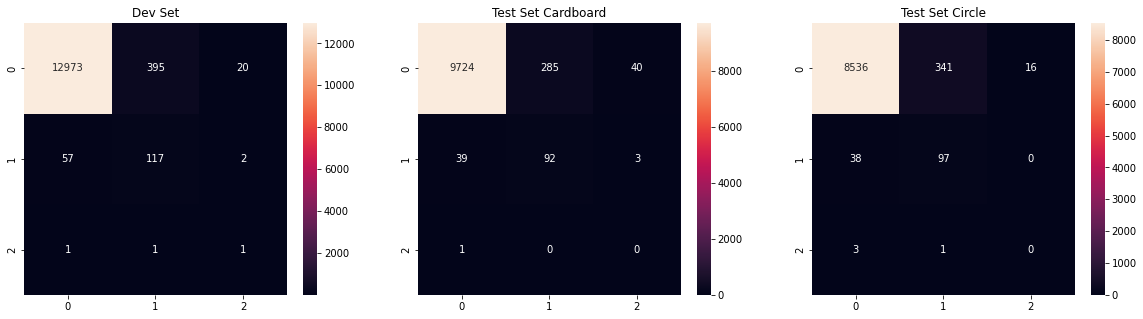

In [60]:
plot_classification_reports(X_dev,
                            y_dev,
                            X_test,
                            y_test,
                            X_test2,
                            y_test2,
                            grid_best_model_xgb,
                            None,
                            'Plots and results/Confusion_Matrix_xgb.pdf')

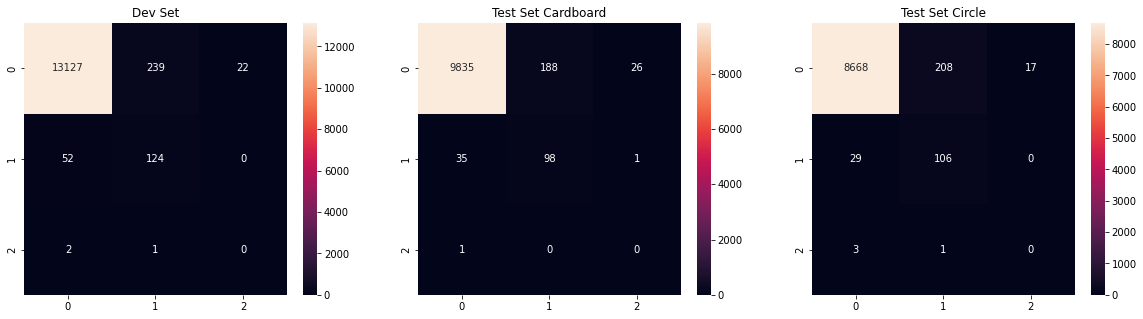

In [59]:
plot_classification_reports(X_dev,
                            y_dev,
                            X_test,
                            y_test,
                            X_test2,
                            y_test2,
                            grid_best_model_svm,
                            None,
                            'Plots and results/Confusion_Matrix_svm.pdf')

In [52]:
reports_df_xgb = get_classification_reports(X_dev,
                                            y_dev,
                                            X_test,
                                            y_test,
                                            X_test2,
                                            y_test2,
                                            grid_best_model_xgb)
reports_df_xgb

,Precision,Recall,F1-score,Support
Test,,,,
Test 0,0.995903,0.967658,0.981578,10049
Test 1,0.244032,0.686567,0.360078,134
Test 2,0.0,0.0,0.0,1
Test macro avg,0.413312,0.551409,0.447219,10184
Test weighted avg,0.985912,0.963865,0.973304,10184
Test1,,,,
Test1 0,0.99522,0.959856,0.977218,8893
Test1 1,0.220957,0.718519,0.337979,135
Test1 2,0.0,0.0,0.0,4


In [53]:
reports_df_xgb.to_latex()

'\\begin{tabular}{lllll}\n\\toprule\n{} & Precision &    Recall &  F1-score & Support \\\\\n\\midrule\nTest               &           &           &           &         \\\\\nTest 0             &  0.995903 &  0.967658 &  0.981578 &   10049 \\\\\nTest 1             &  0.244032 &  0.686567 &  0.360078 &     134 \\\\\nTest 2             &       0.0 &       0.0 &       0.0 &       1 \\\\\nTest macro avg     &  0.413312 &  0.551409 &  0.447219 &   10184 \\\\\nTest weighted avg  &  0.985912 &  0.963865 &  0.973304 &   10184 \\\\\nTest1              &           &           &           &         \\\\\nTest1 0            &   0.99522 &  0.959856 &  0.977218 &    8893 \\\\\nTest1 1            &  0.220957 &  0.718519 &  0.337979 &     135 \\\\\nTest1 2            &       0.0 &       0.0 &       0.0 &       4 \\\\\nTest1 macro avg    &  0.405392 &  0.559458 &  0.438399 &    9032 \\\\\nTest1 weighted avg &  0.983206 &  0.955824 &  0.967231 &    9032 \\\\\nDev                &           &           & 

In [27]:
reports_df_svm = get_classification_reports(X_dev,
                                            y_dev,
                                            X_test,
                                            y_test,
                                            X_test2,
                                            y_test2,
                                            grid_best_model_svm)

reports_df_svm

,Precision,Recall,F1-score,Support
Test,,,,
Test 0,0.996353,0.978704,0.98745,10049
Test 1,0.342657,0.731343,0.466667,134
Test 2,0.0,0.0,0.0,1
Test macro avg,0.446337,0.570016,0.484705,10184
Test weighted avg,0.987654,0.975353,0.9805,10184
Test1,,,,
Test1 0,0.996322,0.974699,0.985392,8893
Test1 1,0.336508,0.785185,0.471111,135
Test1 2,0.0,0.0,0.0,4


In [54]:
reports_df_svm.to_latex()

'\\begin{tabular}{lllll}\n\\toprule\n{} & Precision &    Recall &  F1-score & Support \\\\\n\\midrule\nTest               &           &           &           &         \\\\\nTest 0             &  0.996353 &  0.978704 &   0.98745 &   10049 \\\\\nTest 1             &  0.342657 &  0.731343 &  0.466667 &     134 \\\\\nTest 2             &       0.0 &       0.0 &       0.0 &       1 \\\\\nTest macro avg     &  0.446337 &  0.570016 &  0.484705 &   10184 \\\\\nTest weighted avg  &  0.987654 &  0.975353 &    0.9805 &   10184 \\\\\nTest1              &           &           &           &         \\\\\nTest1 0            &  0.996322 &  0.974699 &  0.985392 &    8893 \\\\\nTest1 1            &  0.336508 &  0.785185 &  0.471111 &     135 \\\\\nTest1 2            &       0.0 &       0.0 &       0.0 &       4 \\\\\nTest1 macro avg    &  0.444277 &  0.586628 &  0.485501 &    9032 \\\\\nTest1 weighted avg &  0.986018 &  0.971435 &  0.977269 &    9032 \\\\\nDev                &           &           & 

# BASELINE only token

In [ ]:
X_train =        df[['token']].copy()
X_test  =   test_df[['token']].copy()
X_test2 =  test2_df[['token']].copy()
X_dev   =    dev_df[['token']].copy()

y_train, y_test, y_test2,  y_dev = df['negCue'], test_df['negCue'], test2_df['negCue'], dev_df['negCue']

In [ ]:
grid_base_xgb, base_xgb_bestParams = train_model(defining_gridsearch('xgb',['token']), X_train, y_train)

BEST PARAMS FOUND BY GRID SEARCH:  {'classifier__colsample_bytree': 0.6, 'classifier__learning_rate': 0.3, 'classifier__max_depth': 3}
Time taken: 1.41 minutes


In [ ]:
grid_base_svm, base_svm_bestParams = train_model(defining_gridsearch('svm',['token']), X_train, y_train)

BEST PARAMS FOUND BY GRID SEARCH:  {'classifier__C': 10.0, 'classifier__gamma': 0.5, 'classifier__kernel': 'polynomial'}
Time taken: 1.14 minutes


In [ ]:
reports_base_svm = get_classification_reports(X_dev,
                                            y_dev,
                                            X_test,
                                            y_test,
                                            X_test2,
                                            y_test2,
                                            grid_base_svm)

reports_base_svm

,Precision,Recall,F1-score,Support
Test,,,,
Test 0,0.996722,0.937904,0.966419,10049
Test 1,0.858696,0.589552,0.699115,134
Test 2,0.0,0.0,0.0,1
Test macro avg,0.618472,0.509152,0.555178,10184
Test weighted avg,0.994808,0.933229,0.962807,10184
Test1,,,,
Test1 0,0.997015,0.938941,0.967107,8893
Test1 1,0.767857,0.637037,0.696356,135
Test1 2,0.0,0.0,0.0,4


In [ ]:
reports_base_svm.to_latex()

'\\begin{tabular}{lllll}\n\\toprule\n{} & Precision &    Recall &  F1-score & Support \\\\\n\\midrule\nTest               &           &           &           &         \\\\\nTest 0             &  0.996722 &  0.937904 &  0.966419 &   10049 \\\\\nTest 1             &  0.858696 &  0.589552 &  0.699115 &     134 \\\\\nTest 2             &       0.0 &       0.0 &       0.0 &       1 \\\\\nTest macro avg     &  0.618472 &  0.509152 &  0.555178 &   10184 \\\\\nTest weighted avg  &  0.994808 &  0.933229 &  0.962807 &   10184 \\\\\nTest1              &           &           &           &         \\\\\nTest1 0            &  0.997015 &  0.938941 &  0.967107 &    8893 \\\\\nTest1 1            &  0.767857 &  0.637037 &  0.696356 &     135 \\\\\nTest1 2            &       0.0 &       0.0 &       0.0 &       4 \\\\\nTest1 macro avg    &  0.588291 &  0.525326 &  0.554488 &    9032 \\\\\nTest1 weighted avg &  0.993148 &  0.934012 &  0.962632 &    9032 \\\\\nDev                &           &           & 

In [ ]:
reports_base_xgb = get_classification_reports(X_dev,
                                            y_dev,
                                            X_test,
                                            y_test,
                                            X_test2,
                                            y_test2,
                                            grid_base_xgb)

reports_base_xgb

,Precision,Recall,F1-score,Support
Test,,,,
Test 0,0.995566,0.938402,0.966139,10049
Test 1,0.894737,0.507463,0.647619,134
Test 2,0.0,0.0,0.0,1
Test macro avg,0.630101,0.481955,0.537919,10184
Test weighted avg,0.994141,0.932639,0.961853,10184
Test1,,,,
Test1 0,0.995595,0.940403,0.967212,8893
Test1 1,0.850575,0.548148,0.666667,135
Test1 2,0.0,0.0,0.0,4


In [ ]:
reports_base_xgb.to_latex()

'\\begin{tabular}{lllll}\n\\toprule\n{} & Precision &    Recall &  F1-score & Support \\\\\n\\midrule\nTest               &           &           &           &         \\\\\nTest 0             &  0.995566 &  0.938402 &  0.966139 &   10049 \\\\\nTest 1             &  0.894737 &  0.507463 &  0.647619 &     134 \\\\\nTest 2             &       0.0 &       0.0 &       0.0 &       1 \\\\\nTest macro avg     &  0.630101 &  0.481955 &  0.537919 &   10184 \\\\\nTest weighted avg  &  0.994141 &  0.932639 &  0.961853 &   10184 \\\\\nTest1              &           &           &           &         \\\\\nTest1 0            &  0.995595 &  0.940403 &  0.967212 &    8893 \\\\\nTest1 1            &  0.850575 &  0.548148 &  0.666667 &     135 \\\\\nTest1 2            &       0.0 &       0.0 &       0.0 &       4 \\\\\nTest1 macro avg    &   0.61539 &  0.496184 &  0.544626 &    9032 \\\\\nTest1 weighted avg &  0.992987 &  0.934123 &  0.962292 &    9032 \\\\\nDev                &           &           & 

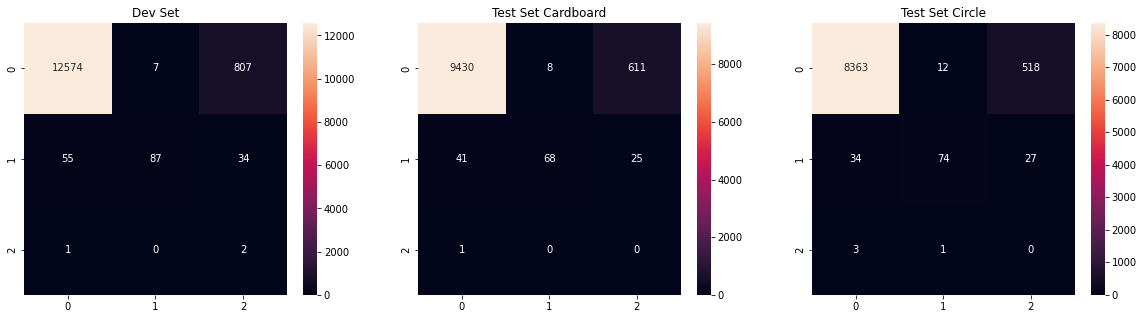

In [ ]:
plot_classification_reports(X_dev,
                            y_dev,
                            X_test,
                            y_test,
                            X_test2,
                            y_test2,
                            grid_base_xgb,
                            None,
                            'Confusion_Matrix_base_xgb.pdf')

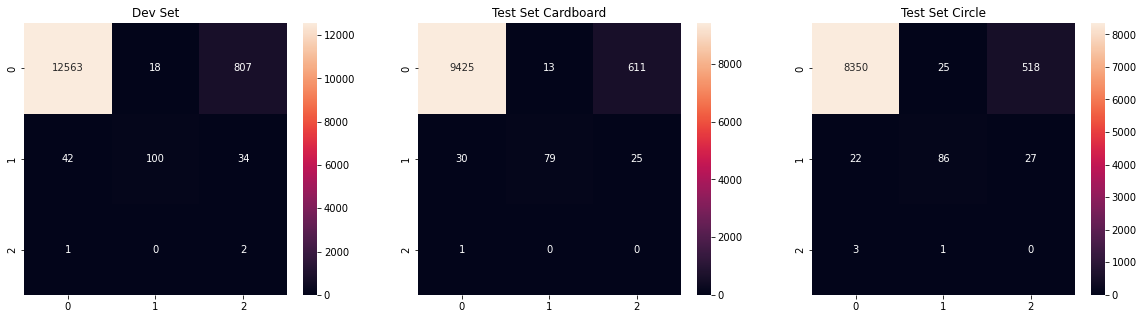

In [ ]:
plot_classification_reports(X_dev,
                            y_dev,
                            X_test,
                            y_test,
                            X_test2,
                            y_test2,
                            grid_base_svm,
                            None,
                            'Confusion_Matrix_base_svm.pdf')

# ERROR ANALYSIS

In [27]:
data = test2_df.copy()

data['prediction_xgb'] = grid_best_model_xgb.predict(X_test2).tolist()
data['prediction_svm'] = grid_best_model_svm.predict(X_test2).tolist()

# save data to csv

data.to_csv('Plots and results/predictions_on_circle.csv')

In [14]:
data.head()

,nSentence,sentence,file,nToken,token,negCue,lemma,prev_lemma,tag,dependency,head,root_path,neg_exp_list,affix_cue,prediction_xgb,prediction_svm
0,0,"`` Well , Mrs. Warren , I can not see that you...",circle01,0,``,0,`,,``,punct,see,1,False,False,0,0.0
1,0,"`` Well , Mrs. Warren , I can not see that you...",circle01,1,Well,0,`,`,``,punct,see,1,False,False,0,0.0
2,0,"`` Well , Mrs. Warren , I can not see that you...",circle01,2,",",0,well,`,UH,intj,see,1,False,False,0,0.0
3,0,"`` Well , Mrs. Warren , I can not see that you...",circle01,3,Mrs.,0,",",well,",",punct,see,1,False,False,0,0.0
4,0,"`` Well , Mrs. Warren , I can not see that you...",circle01,4,Warren,0,Mrs.,",",NNP,compound,Warren,2,False,False,0,0.0


In [15]:
data.query('(prediction_xgb == 1 and negCue == 0)')

,nSentence,sentence,file,nToken,token,negCue,lemma,prev_lemma,tag,dependency,head,root_path,neg_exp_list,affix_cue,prediction_xgb,prediction_svm
10,0,"`` Well , Mrs. Warren , I can not see that you...",circle01,10,that,0,see,not,VB,ROOT,see,0,False,False,1,1.0
21,0,"`` Well , Mrs. Warren , I can not see that you...",circle01,21,I,0,do,nor,VBP,aux,understand,3,False,False,1,1.0
34,0,"`` Well , Mrs. Warren , I can not see that you...",circle01,34,interfere,0,should,",",MD,aux,interfere,4,False,False,1,0.0
45,1,I really have other things to engage me . '',circle01,6,engage,0,to,thing,TO,aux,engage,3,False,False,1,0.0
79,100,`` Dear me ! that is certainly remarkable .,circle01,7,remarkable,0,be,that,VBZ,ROOT,is,0,False,False,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4005,95,"`` Oh , Dio mio , you have killed him ! ''",circle02,5,",",0,`,`,``,punct,not,1,False,False,1,1.0
4006,95,"`` Oh , Dio mio , you have killed him ! ''",circle02,6,you,0,perhaps,`,RB,advmod,not,1,False,False,1,1.0
4007,95,"`` Oh , Dio mio , you have killed him ! ''",circle02,7,have,0,not,perhaps,RB,ROOT,not,0,True,False,1,1.0
4008,95,"`` Oh , Dio mio , you have killed him ! ''",circle02,8,killed,0,.,not,.,punct,not,1,False,False,1,1.0


In [16]:
data.query('(prediction_svm == 1 and negCue == 0)')

,nSentence,sentence,file,nToken,token,negCue,lemma,prev_lemma,tag,dependency,head,root_path,neg_exp_list,affix_cue,prediction_xgb,prediction_svm
10,0,"`` Well , Mrs. Warren , I can not see that you...",circle01,10,that,0,see,not,VB,ROOT,see,0,False,False,1,1.0
21,0,"`` Well , Mrs. Warren , I can not see that you...",circle01,21,I,0,do,nor,VBP,aux,understand,3,False,False,1,1.0
101,103,"`` Well , we do n't seem to have much material...",circle01,0,``,0,else,nothing,RB,advmod,nothing,3,False,False,1,1.0
110,103,"`` Well , we do n't seem to have much material...",circle01,9,much,0,not,do,RB,neg,seem,1,False,False,1,1.0
111,103,"`` Well , we do n't seem to have much material...",circle01,10,material,0,seem,not,VB,ROOT,seem,0,False,False,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4006,95,"`` Oh , Dio mio , you have killed him ! ''",circle02,6,you,0,perhaps,`,RB,advmod,not,1,False,False,1,1.0
4007,95,"`` Oh , Dio mio , you have killed him ! ''",circle02,7,have,0,not,perhaps,RB,ROOT,not,0,True,False,1,1.0
4008,95,"`` Oh , Dio mio , you have killed him ! ''",circle02,8,killed,0,.,not,.,punct,not,1,False,False,1,1.0
4019,96,Then I heard a sudden sharp intake of her brea...,circle02,7,of,0,not,can,RB,neg,imagine,1,False,False,0,1.0


In [32]:
#false positives
data.query('(prediction_xgb == 2 and negCue == 0 and neg_exp_list == False)')

,nSentence,sentence,file,nToken,token,negCue,lemma,prev_lemma,tag,dependency,head,root_path,neg_exp_list,affix_cue,prediction_xgb,prediction_svm
33,1,"There , dimly outlined at the top window , I c...",circle02,15,a,0,a,of,DT,det,head,4,False,False,2.0,2.0
34,1,"There , dimly outlined at the top window , I c...",circle02,16,head,0,head,a,NN,pobj,of,3,False,False,2.0,2.0
35,1,"There , dimly outlined at the top window , I c...",circle02,17,",",0,",",head,",",punct,shadow,2,False,False,2.0,2.0
39,1,"There , dimly outlined at the top window , I c...",circle02,21,head,0,head,'s,NN,appos,shadow,2,False,False,2.0,2.0
40,1,"There , dimly outlined at the top window , I c...",circle02,22,",",0,",",head,",",punct,see,1,False,False,2.0,2.0
951,147,"Signor Castalotte was a bachelor , and I belie...",circle02,12,as,0,he,make,PRP,nsubj,head,3,False,False,2.0,2.0
952,147,"Signor Castalotte was a bachelor , and I belie...",circle02,13,if,0,head,he,NN,ccomp,made,2,False,False,2.0,2.0
953,147,"Signor Castalotte was a bachelor , and I belie...",circle02,14,Gennaro,0,of,head,IN,prep,head,3,False,False,2.0,2.0
1578,174,All this Gennaro told me and showed me a summo...,circle02,24,head,0,plant,already,VBN,conj,come,1,False,False,2.0,2.0
1615,175,"`` That was bad enough , but worse was to come .",circle02,10,come,0,of,head,IN,prep,head,8,False,False,2.0,2.0


In [17]:
data.query('(prediction_svm == 2 and negCue == 0 and neg_exp_list == False)')

,nSentence,sentence,file,nToken,token,negCue,lemma,prev_lemma,tag,dependency,head,root_path,neg_exp_list,affix_cue,prediction_xgb,prediction_svm
33,1,"There , dimly outlined at the top window , I c...",circle02,15,a,0,a,of,DT,det,head,4,False,False,0,2.0
34,1,"There , dimly outlined at the top window , I c...",circle02,16,head,0,head,a,NN,pobj,of,3,False,False,0,2.0
35,1,"There , dimly outlined at the top window , I c...",circle02,17,",",0,",",head,",",punct,shadow,2,False,False,0,2.0
39,1,"There , dimly outlined at the top window , I c...",circle02,21,head,0,head,'s,NN,appos,shadow,2,False,False,2,2.0
40,1,"There , dimly outlined at the top window , I c...",circle02,22,",",0,",",head,",",punct,see,1,False,False,0,2.0
951,147,"Signor Castalotte was a bachelor , and I belie...",circle02,12,as,0,he,make,PRP,nsubj,head,3,False,False,0,2.0
952,147,"Signor Castalotte was a bachelor , and I belie...",circle02,13,if,0,head,he,NN,ccomp,made,2,False,False,2,2.0
953,147,"Signor Castalotte was a bachelor , and I belie...",circle02,14,Gennaro,0,of,head,IN,prep,head,3,False,False,0,2.0
1578,174,All this Gennaro told me and showed me a summo...,circle02,24,head,0,plant,already,VBN,conj,come,1,False,False,2,2.0
1615,175,"`` That was bad enough , but worse was to come .",circle02,10,come,0,of,head,IN,prep,head,8,False,False,2,2.0


In [34]:
data.query('prediction_xgb == 0 and negCue == 1')

,nSentence,sentence,file,nToken,token,negCue,lemma,prev_lemma,tag,dependency,head,root_path,neg_exp_list,affix_cue,prediction_xgb,prediction_svm
106,103,"`` Well , we do n't seem to have much material...",circle01,5,n't,1,well,`,UH,intj,seem,1,False,False,0.0,0.0
127,104,Do you say nothing has come out of that room -...,circle01,11,absolutely,1,of,out,IN,prep,out,3,False,False,0.0,0.0
287,116,`` I do n't understand that .,circle01,3,n't,1,?,say,.,punct,say,1,False,False,0.0,0.0
432,126,"You have received your rent , and he is not a ...",circle01,19,unusual,1,.,of,.,punct,have,1,False,False,0.0,0.0
491,129,"I 've taken up the matter , and I wo n't lose ...",circle01,10,n't,1,think,to,VB,relcl,reason,3,False,False,0.0,0.0
499,13,"You do n't object to tobacco , I take it ?",circle01,2,n't,1,it,for,PRP,pobj,for,7,False,False,0.0,0.0
871,149,But surely the most valuable hunting-ground th...,circle01,15,unusual,1,chorus,a,NN,dobj,turning,2,False,False,0.0,0.0
1032,158,"` Every day my heart longs -- ' Bleat , Watson...",circle01,12,unmitigated,1,that,--,DT,nsubj,appears,1,False,False,0.0,0.0
1269,183,"If we wait a little , Watson , I do n't doubt ...",circle01,10,n't,1,that,',DT,nsubj,was,1,False,False,0.0,0.0
1353,19,I ca n't sleep for fright .,circle01,2,n't,1,be,how,VBZ,ROOT,'s,0,False,False,0.0,0.0


In [18]:
data.query('prediction_svm == 0 and negCue == 1')

,nSentence,sentence,file,nToken,token,negCue,lemma,prev_lemma,tag,dependency,head,root_path,neg_exp_list,affix_cue,prediction_xgb,prediction_svm
106,103,"`` Well , we do n't seem to have much material...",circle01,5,n't,1,well,`,UH,intj,seem,1,False,False,0,0.0
127,104,Do you say nothing has come out of that room -...,circle01,11,absolutely,1,of,out,IN,prep,out,3,False,False,0,0.0
287,116,`` I do n't understand that .,circle01,3,n't,1,?,say,.,punct,say,1,False,False,0,0.0
432,126,"You have received your rent , and he is not a ...",circle01,19,unusual,1,.,of,.,punct,have,1,False,False,0,0.0
491,129,"I 've taken up the matter , and I wo n't lose ...",circle01,10,n't,1,think,to,VB,relcl,reason,3,False,False,0,0.0
499,13,"You do n't object to tobacco , I take it ?",circle01,2,n't,1,it,for,PRP,pobj,for,7,False,False,0,0.0
871,149,But surely the most valuable hunting-ground th...,circle01,15,unusual,1,chorus,a,NN,dobj,turning,2,False,False,0,0.0
1032,158,"` Every day my heart longs -- ' Bleat , Watson...",circle01,12,unmitigated,1,that,--,DT,nsubj,appears,1,False,False,0,0.0
1269,183,"If we wait a little , Watson , I do n't doubt ...",circle01,10,n't,1,that,',DT,nsubj,was,1,False,False,0,0.0
1353,19,I ca n't sleep for fright .,circle01,2,n't,1,be,how,VBZ,ROOT,'s,0,False,False,0,0.0


In [19]:
data.query('prediction_xgb == 0 and negCue == 2')

,nSentence,sentence,file,nToken,token,negCue,lemma,prev_lemma,tag,dependency,head,root_path,neg_exp_list,affix_cue,prediction_xgb,prediction_svm
1437,196,`` I 'll have no more of it !,circle01,5,more,2,our,'',PRP$,poss,client,2,False,False,0,0.0
4130,41,"` If not , I 'll have no more to do with you . '",circle01,8,more,2,`,.,``,punct,said,1,False,False,0,0.0
1798,182,He struck Gennaro senseless and fled from the ...,circle02,13,more,2,",",embrace,",",punct,covered,2,False,False,0,0.0


In [20]:
data.query('prediction_svm == 0 and negCue == 2')

,nSentence,sentence,file,nToken,token,negCue,lemma,prev_lemma,tag,dependency,head,root_path,neg_exp_list,affix_cue,prediction_xgb,prediction_svm
1437,196,`` I 'll have no more of it !,circle01,5,more,2,our,'',PRP$,poss,client,2,False,False,0,0.0
4130,41,"` If not , I 'll have no more to do with you . '",circle01,8,more,2,`,.,``,punct,said,1,False,False,0,0.0
1798,182,He struck Gennaro senseless and fled from the ...,circle02,13,more,2,",",embrace,",",punct,covered,2,False,False,0,0.0


In [21]:
data.query('prediction_svm == 1 and negCue == 1')

,nSentence,sentence,file,nToken,token,negCue,lemma,prev_lemma,tag,dependency,head,root_path,neg_exp_list,affix_cue,prediction_xgb,prediction_svm
8,0,"`` Well , Mrs. Warren , I can not see that you...",circle01,8,not,1,can,I,MD,aux,see,1,False,False,1,1.0
17,0,"`` Well , Mrs. Warren , I can not see that you...",circle01,17,uneasiness,1,for,cause,IN,prep,cause,3,False,False,0,1.0
19,0,"`` Well , Mrs. Warren , I can not see that you...",circle01,19,nor,1,",",uneasiness,",",punct,have,2,False,False,1,1.0
97,102,`` He had one big brown bag with him -- nothin...,circle01,10,nothing,1,with,bag,IN,prep,bag,2,False,False,1,1.0
119,104,Do you say nothing has come out of that room -...,circle01,3,nothing,1,.,we,.,punct,seem,1,False,False,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,35,"We KNOW he is at the bottom of fifty murders ,...",circle02,15,nothing,1,fall,light,VBD,advcl,started,1,False,False,1,1.0
3235,51,`` But we have no warrant for his arrest . '',circle02,4,no,1,or,",",CC,cc,caught,3,False,False,1,1.0
3309,56,Our official detectives may blunder in the mat...,circle02,12,never,1,have,we,VBP,ROOT,have,0,False,False,1,1.0
3884,88,"`` Not much , Mr. Holmes , among the millions ...",circle02,1,Not,1,three,that,CD,nummod,people,4,False,False,1,1.0


In [22]:
data.query('prediction_svm == 2 and negCue == 2')

,nSentence,sentence,file,nToken,token,negCue,lemma,prev_lemma,tag,dependency,head,root_path,neg_exp_list,affix_cue,prediction_xgb,prediction_svm


In [23]:
data.query('prediction_svm == 0 and negCue == 0')

,nSentence,sentence,file,nToken,token,negCue,lemma,prev_lemma,tag,dependency,head,root_path,neg_exp_list,affix_cue,prediction_xgb,prediction_svm
0,0,"`` Well , Mrs. Warren , I can not see that you...",circle01,0,``,0,`,,``,punct,see,1,False,False,0,0.0
1,0,"`` Well , Mrs. Warren , I can not see that you...",circle01,1,Well,0,`,`,``,punct,see,1,False,False,0,0.0
2,0,"`` Well , Mrs. Warren , I can not see that you...",circle01,2,",",0,well,`,UH,intj,see,1,False,False,0,0.0
3,0,"`` Well , Mrs. Warren , I can not see that you...",circle01,3,Mrs.,0,",",well,",",punct,see,1,False,False,0,0.0
4,0,"`` Well , Mrs. Warren , I can not see that you...",circle01,4,Warren,0,Mrs.,",",NNP,compound,Warren,2,False,False,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4093,99,Suddenly she stopped and gazed at us all with ...,circle02,8,with,0,dark,the,JJ,amod,figure,4,False,False,0,0.0
4094,99,Suddenly she stopped and gazed at us all with ...,circle02,9,a,0,figure,dark,NN,pobj,upon,3,False,False,0,0.0
4095,99,Suddenly she stopped and gazed at us all with ...,circle02,10,questioning,0,on,figure,IN,prep,figure,4,False,False,0,0.0
4096,99,Suddenly she stopped and gazed at us all with ...,circle02,11,stare,0,the,on,DT,det,floor,6,False,False,0,0.0


In [24]:
data.query('prediction_xgb == 0 and negCue == 0')

,nSentence,sentence,file,nToken,token,negCue,lemma,prev_lemma,tag,dependency,head,root_path,neg_exp_list,affix_cue,prediction_xgb,prediction_svm
0,0,"`` Well , Mrs. Warren , I can not see that you...",circle01,0,``,0,`,,``,punct,see,1,False,False,0,0.0
1,0,"`` Well , Mrs. Warren , I can not see that you...",circle01,1,Well,0,`,`,``,punct,see,1,False,False,0,0.0
2,0,"`` Well , Mrs. Warren , I can not see that you...",circle01,2,",",0,well,`,UH,intj,see,1,False,False,0,0.0
3,0,"`` Well , Mrs. Warren , I can not see that you...",circle01,3,Mrs.,0,",",well,",",punct,see,1,False,False,0,0.0
4,0,"`` Well , Mrs. Warren , I can not see that you...",circle01,4,Warren,0,Mrs.,",",NNP,compound,Warren,2,False,False,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4093,99,Suddenly she stopped and gazed at us all with ...,circle02,8,with,0,dark,the,JJ,amod,figure,4,False,False,0,0.0
4094,99,Suddenly she stopped and gazed at us all with ...,circle02,9,a,0,figure,dark,NN,pobj,upon,3,False,False,0,0.0
4095,99,Suddenly she stopped and gazed at us all with ...,circle02,10,questioning,0,on,figure,IN,prep,figure,4,False,False,0,0.0
4096,99,Suddenly she stopped and gazed at us all with ...,circle02,11,stare,0,the,on,DT,det,floor,6,False,False,0,0.0


In [25]:
data.query('prediction_xgb == 1 and negCue == 1')

,nSentence,sentence,file,nToken,token,negCue,lemma,prev_lemma,tag,dependency,head,root_path,neg_exp_list,affix_cue,prediction_xgb,prediction_svm
8,0,"`` Well , Mrs. Warren , I can not see that you...",circle01,8,not,1,can,I,MD,aux,see,1,False,False,1,1.0
19,0,"`` Well , Mrs. Warren , I can not see that you...",circle01,19,nor,1,",",uneasiness,",",punct,have,2,False,False,1,1.0
97,102,`` He had one big brown bag with him -- nothin...,circle01,10,nothing,1,with,bag,IN,prep,bag,2,False,False,1,1.0
119,104,Do you say nothing has come out of that room -...,circle01,3,nothing,1,.,we,.,punct,seem,1,False,False,1,1.0
191,109,"`` There is nothing here , '' said he .",circle01,3,nothing,1,shrug,Holmes,VBD,ROOT,shrugged,0,False,False,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,35,"We KNOW he is at the bottom of fifty murders ,...",circle02,15,nothing,1,fall,light,VBD,advcl,started,1,False,False,1,1.0
3235,51,`` But we have no warrant for his arrest . '',circle02,4,no,1,or,",",CC,cc,caught,3,False,False,1,1.0
3309,56,Our official detectives may blunder in the mat...,circle02,12,never,1,have,we,VBP,ROOT,have,0,False,False,1,1.0
3884,88,"`` Not much , Mr. Holmes , among the millions ...",circle02,1,Not,1,three,that,CD,nummod,people,4,False,False,1,1.0


In [26]:
data.query('prediction_xgb == 2 and negCue == 2')

,nSentence,sentence,file,nToken,token,negCue,lemma,prev_lemma,tag,dependency,head,root_path,neg_exp_list,affix_cue,prediction_xgb,prediction_svm
